# Class 2: Reading in tricky files

&nbsp;  
**Welcome to class 2!** In the last class you entered your data directly into Python. Most of the data analysis you will be doing in this course, and likely in the future, will use datasets that are stored on your computer, or available on the internet. In this class, we will practice downloading datasets and opening them as pandas dataframes ready for cleaning and subsetting (next week).

&nbsp;  
<div>
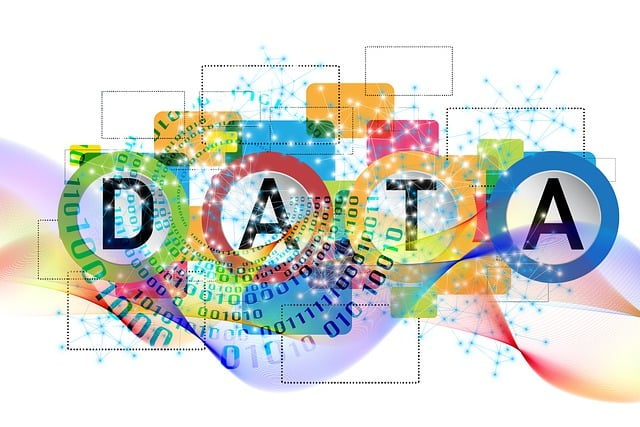
</div>
&nbsp;  

## Load the modules

First, let's import pandas.

In [1]:
import pandas as pd

## Let's start with some straightforward examples

Pandas has a method for directly reading in excel sheets...

In [2]:
df = pd.read_excel('../Datasets/count.xls')

In [3]:
df.head()

,Field,Sheep,Goats,Barley,Oats
0,1,45,44,103,521
1,2,5,2,233,324
2,3,67,23,432,734
3,4,8,6,612,123
4,5,23,7,332,243


... and for reading in comma delimited (.csv) files.

In [4]:
df = pd.read_csv('../Datasets/count.csv')

In [5]:
df.head()

,Field,Sheep,Goats,Barley,Oats
0,Waun_fach,45,44,103,521
1,Ffos_fawr,5,2,233,324
2,Aberheidol,67,23,432,734
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243


What about tab deliminated (.txt) files? Let's try `pd.read_csv`. Does it look like it has loaded correctly?

In [6]:
df = pd.read_csv('../Datasets/count.txt')

In [7]:
df.head()

,Field\tSheep\tGoats\tBarley\tOats
0,1\t45\t44\t103\t521
1,2\t5\t2\t233\t324
2,3\t67\t23\t432\t734
3,4\t8\t6\t612\t123
4,5\t23\t7\t332\t243


There are two ways we can load in .txt files. One way is to add an extra command to `pd.read_csv` that tells Python the file is tab delimited.

In [8]:
df = pd.read_csv('../Datasets/count.txt', sep = "\t") # this tells Python the separator (or delimiter) is a tab

In [9]:
df.head()

,Field,Sheep,Goats,Barley,Oats
0,1,45,44,103,521
1,2,5,2,233,324
2,3,67,23,432,734
3,4,8,6,612,123
4,5,23,7,332,243


Another way is to use the `pd.read_table` command. In the cell below, try using `pd.read_table` to read in count.txt (tip: you do not need to specify the delimiter). Check that it has loaded correctly.

In [10]:
df = pd.read_table('../Datasets/count.txt')

In [11]:
df.head()

,Field,Sheep,Goats,Barley,Oats
0,1,45,44,103,521
1,2,5,2,233,324
2,3,67,23,432,734
3,4,8,6,612,123
4,5,23,7,332,243


Our data seems to have loaded! We can now check that things are looking the way they should by using the commands `df.info()` and `df.dtypes`. Type these into the cells below and have a look at the output. Can you work out what they are telling you?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Field   10 non-null     int64
 1   Sheep   10 non-null     int64
 2   Goats   10 non-null     int64
 3   Barley  10 non-null     int64
 4   Oats    10 non-null     int64
dtypes: int64(5)
memory usage: 528.0 bytes


In [13]:
df.dtypes

Field     int64
Sheep     int64
Goats     int64
Barley    int64
Oats      int64
dtype: object

## Slightly more complicated examples

Let's start by loading in count_duff1.txt, which can also be found in the Datasets folder. Write code in the cell below to load this in and call it df1. Check it has loaded correctly by using `df1.head()` and `df1.info()`.

In [14]:
df1 = pd.read_table('../Datasets/count_duff1.txt')

In [15]:
df1.head()

,Field,Sheep,Goats,Barley,Oats
0,1,45.0,44,103,521
1,2,NaN,2,233,324
2,3,67.0,23,432,734
3,4,8.0,6,612,123
4,5,23.0,*,332,243


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Field   10 non-null     int64  
 1   Sheep   9 non-null      float64
 2   Goats   10 non-null     object 
 3   Barley  10 non-null     object 
 4   Oats    10 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 528.0+ bytes


There are a couple of issues here. First, you might have noticed from `df1.head()` that we seem to have two different ways of signifying a missing value: NaN (which stands for 'not a number' and is the most common way of representing missing data) and \*. It is possible to correct this after the data has been loaded, but here is a way we can do it when we load the data in.

In [17]:
df1 = pd.read_table("../Datasets/count_duff1.txt", na_values = "*") # this tells Python to consider * as a missing value

In [18]:
df1.head()

,Field,Sheep,Goats,Barley,Oats
0,1,45.0,44.0,103.0,521.0
1,2,NaN,2.0,233.0,324.0
2,3,67.0,23.0,432.0,734.0
3,4,8.0,6.0,612.0,123.0
4,5,23.0,NaN,332.0,243.0


Success! Our * has been turned to NaN. But there is another problem. `df1.info()` showed that our numerical columns have been coded as integers, floats and objects! Since we are dealing with whole numbers only, it would be preferable to have them all coded as integers. Again, it is possible to fix this once the data has been loaded, but we can also do it when we read the file in.

In [19]:
df1 = pd.read_table("../Datasets/count_duff1.txt", na_values = "*", dtype = pd.Int64Dtype())

In [20]:
df1.head()

,Field,Sheep,Goats,Barley,Oats
0,1,45,44,103,521
1,2,<NA>,2,233,324
2,3,67,23,432,734
3,4,8,6,612,123
4,5,23,<NA>,332,243


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Field   10 non-null     Int64
 1   Sheep   9 non-null      Int64
 2   Goats   8 non-null      Int64
 3   Barley  8 non-null      Int64
 4   Oats    9 non-null      Int64
dtypes: Int64(5)
memory usage: 578.0 bytes


It looks like our table has been fixed! Now have a go loading in count_duff2.txt and fixing it in the same way.

In [22]:
df2 = pd.read_table('../Datasets/count_duff2.txt', na_values = "*", dtype = pd.Int64Dtype())

Now let's load in count_duff5.txt and see what it looks like.

In [23]:
df5 = pd.read_table('../Datasets/count_duff5.txt')

In [24]:
df5.head()

,1,45,44,103,521
0,2,NaN,2.0,233.0,324.0
1,3,67.0,23.0,432.0,734.0
2,4,8.0,6.0,612.0,123.0
3,5,23.0,NaN,332.0,243.0
4,6,4.0,9.0,12.0,734.0


In [25]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       9 non-null      int64  
 1   45      8 non-null      float64
 2   44      7 non-null      float64
 3   103     7 non-null      float64
 4   521     8 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 488.0 bytes


It looks like we have the same issue with the coding of our numerical variables, but we're also missing our column headers! Let's fix this by specifying the data type (in this case, integers) and the column headers.

In [26]:
df5 = pd.read_table("../Datasets/count_duff5.txt", dtype = pd.Int64Dtype(), header = None, 
                    names = ["Field", "Sheep", "Goats", "Barley", "Oats"])

In [27]:
df5.head()

,Field,Sheep,Goats,Barley,Oats
0,1,45,44,103,521
1,2,<NA>,2,233,324
2,3,67,23,432,734
3,4,8,6,612,123
4,5,23,<NA>,332,243


In [28]:
df5.dtypes

Field     Int64
Sheep     Int64
Goats     Int64
Barley    Int64
Oats      Int64
dtype: object

## Loading data from the internet

Let's now look at a dataset that is available to download from the internet. This is a dataset of expected genome species, and is available here: https://www.ncbi.nlm.nih.gov/assembly/help/genome-size-check/.

&nbsp;  
<div>
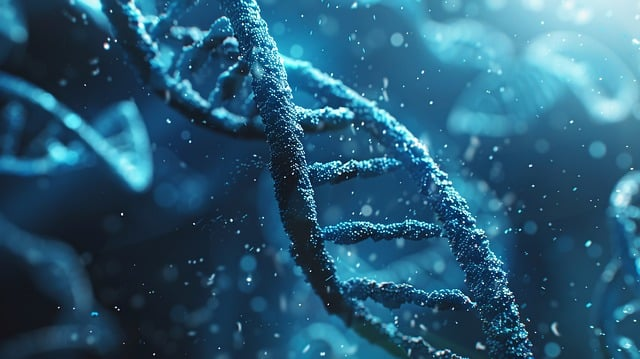
</div>
&nbsp;  

In the cell below is some code for downloading the data directly into your working directory. It will be saved in the same location as this workbook. Please don't worry if you don't understand what this all means.  

In [ ]:
! wget https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/species_genome_size.txt.gz # this code downloads the data into your working directory
! gunzip species_genome_size.txt.gz # this code unzips it

Have a go reading in species_genome_size.txt, calling it df. Hint: it is **not** in the Datasets folder this time.

In [29]:
df = pd.read_table('species_genome_size.txt')

Now have a look at it a bit closer using`df.shape`, `df.head()` and `df.info()`.

In [30]:
df.shape

(4891, 6)

In [31]:
df.head()

,#species_taxid,min_ungapped_length,max_ungapped_length,expected_ungapped_length,number_of_genomes,method_determined
0,7,4521000,6782000,5636513,5,automatic
1,9,281000,845000,559368,134,automatic
2,23,3680000,5522000,4631520,5,automatic
3,24,3508000,5264000,4386283,14,automatic
4,34,7410000,11116000,9263329,21,automatic


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4891 entries, 0 to 4890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   #species_taxid            4891 non-null   int64 
 1   min_ungapped_length       4891 non-null   int64 
 2   max_ungapped_length       4891 non-null   int64 
 3   expected_ungapped_length  4891 non-null   int64 
 4   number_of_genomes         4891 non-null   int64 
 5   method_determined         4891 non-null   object
dtypes: int64(5), object(1)
memory usage: 229.4+ KB


Now for a bit of revision from class 1. In the cell below, write some code to find the maximum value of the number_of_genomes column.

In [33]:
df['number_of_genomes'].max() # there are lots of different ways you could do this

545286

It would be interesting to know what species this is. Again, there are a couple of ways that you can do this. Today, we'll try sorting the dataframe. You'll get more practice with sorting in a later class.

In [34]:
df.sort_values(by=['number_of_genomes'], ascending = False) # ascending = False means the highest values are at the top.

,#species_taxid,min_ungapped_length,max_ungapped_length,expected_ungapped_length,number_of_genomes,method_determined
625,28901,4100000,6000000,5050000,545286,manually-set
77,562,4000000,6300000,5150000,279296,manually-set
2627,1280,2200000,3400000,2800000,91869,manually-set
9,197,1370000,2600000,1985000,80634,manually-set
2545,573,4500000,6700000,5600000,69435,manually-set
...,...,...,...,...,...,...
4584,1448857,1370000,2600000,1985000,3,manually-set
2214,2027919,4100000,6100000,5100000,2,manually-set
1720,522485,1370000,2600000,1985000,2,manually-set
979,67829,4300000,6200000,5250000,1,manually-set


Go to https://www.ncbi.nlm.nih.gov/datasets/taxonomy/tree/ and type the species ID (#species_taxid) with the largest genome size into the search box at the top of the page. Write the name of the species in the cell below.

> Salmonella enterica

## Really tricky files

Not all data are so tidy. Sometimes datasets need considerable tidying before they can be analysed. Let's now look at an excel spreadsheet on agricultural productivity in the UK since 1973.

In the cell below, read in the excel spreadsheet 'AUK-Chapter5-13jul23.xlsx' available in the Datasets folder. Call it df.

In [35]:
df = pd.read_excel('../Datasets/AUK-Chapter5-13jul23.xlsx')

Now examine it a bit closer using `df.head()`.

In [36]:
df.head()

,Date of update: 13 July 2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Next update: July 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data for Tables 5.1 to 5.2 and Figures 5.1 to ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Enquiries: Tim Buttanshaw on +44 (0)20 8026 3601,NaN,NaN,NaN,NaN,NaN,Email: farmaccounts@defra.gov.uk,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


At least it reads in, but it's clearly not right. The first few rows are not data, so we need to exclude them. We can do this by telling pandas to skip the first few rows.

In [37]:
df = pd.read_excel('../Datasets/AUK-Chapter5-13jul23.xlsx', skiprows = 8)

In [38]:
df.head()

,Unnamed: 0,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1 Output of cereals,100.0,106.495639,96.861286,89.477469,110.017057,119.097829,123.214382,145.505545,153.275035,...,159.185468,204.371418,207.873040,183.962101,187.381859,167.727641,206.282808,143.027317,175.497720,183.789535
1,wheat,100.0,111.061991,98.020137,92.535909,99.814874,118.013991,136.718803,167.555883,169.366646,...,221.868376,320.422202,320.214118,282.738719,284.765282,254.079302,307.525725,175.039016,262.137395,266.115915
2,rye,100.0,80.000000,80.000000,90.000000,130.000000,160.000000,140.000000,140.000000,140.000000,...,200.000000,200.000000,200.000000,200.000000,170.000000,200.000000,200.000000,170.000000,160.000000,160.000000
3,barley,100.0,102.990299,96.847398,86.706771,118.946768,120.665549,112.153582,125.370434,139.555483,...,91.661480,91.255261,97.944402,85.812830,90.395552,79.475726,104.156617,101.611031,84.288789,94.005522
4,oats and summer cereal mixtures,100.0,87.693467,62.679100,83.193481,103.254031,80.363224,53.065491,91.279634,81.989521,...,246.672175,187.512361,195.833854,199.163893,201.627770,219.658237,232.615482,293.927714,247.231288,302.081174


We've used `df.head()` to look at the top of a dataframe. But is there a way we can look at the bottom? Have a look through the pandas documentation (https://pandas.pydata.org/docs/reference/frame.html) and see if you can find a suitable function. Have a go writing some code that displays the bottom 10 rows.

In [39]:
df.tail(10)

,Unnamed: 0,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
62,Productivity by labour (11 divided by 23),100.0,104.915892,102.630282,101.920775,110.686948,117.045601,121.915979,128.373983,130.988725,...,247.123313,264.283442,268.092024,262.114449,271.157874,263.819732,273.572541,261.050528,269.367027,269.005389
63,Productivity by land (11 divided by 24),100.0,100.740438,97.074194,94.570771,101.351266,105.924040,108.467968,111.874632,112.091873,...,128.525216,137.798562,141.245197,135.563103,140.037542,137.720219,142.162102,136.635014,141.715292,144.899441
64,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,(a) This table presents volume indices for all...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,(b) To increase the usability and transparity ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,(c) Potato prices and yield information were p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,"(d) We have renamed cattle, sheep, and pigs pr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,© Crown copyright 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The bottom of the dataframe is untidy too. We can use `skipfooter` to tidy this up.

In [40]:
df = pd.read_excel('../Datasets/AUK-Chapter5-13jul23.xlsx',  skiprows = 8, skipfooter = 7)

Some rows in this dataset have **missing values**. You might want to remove these, which you can do using the `df.dropna()` method. The `dropna()` method returns a new dataframe unless the `inplace` parameter is set to `True`, in that case the `dropna()` method removes the rows from the original dataframe instead.

(Note: completely empty rows are automatically skipped when reading in).

In [41]:
df.dropna(inplace = True)

There are lots of ways you can adapt this method, for example...

- `df.dropna(axis = 'columns', inplace = True)` drops the columns containing missing values
- `df.dropna(thresh = 2, inplace = True)` drops the rows with more than two missing values
- `df.dropna(subset = [1983, 1997], inplace = True)` drops rows with missing values in the '1983' or '1997' columns

In [42]:
df.head()

,Unnamed: 0,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1 Output of cereals,100.0,106.495639,96.861286,89.477469,110.017057,119.097829,123.214382,145.505545,153.275035,...,159.185468,204.371418,207.873040,183.962101,187.381859,167.727641,206.282808,143.027317,175.497720,183.789535
1,wheat,100.0,111.061991,98.020137,92.535909,99.814874,118.013991,136.718803,167.555883,169.366646,...,221.868376,320.422202,320.214118,282.738719,284.765282,254.079302,307.525725,175.039016,262.137395,266.115915
2,rye,100.0,80.000000,80.000000,90.000000,130.000000,160.000000,140.000000,140.000000,140.000000,...,200.000000,200.000000,200.000000,200.000000,170.000000,200.000000,200.000000,170.000000,160.000000,160.000000
3,barley,100.0,102.990299,96.847398,86.706771,118.946768,120.665549,112.153582,125.370434,139.555483,...,91.661480,91.255261,97.944402,85.812830,90.395552,79.475726,104.156617,101.611031,84.288789,94.005522
4,oats and summer cereal mixtures,100.0,87.693467,62.679100,83.193481,103.254031,80.363224,53.065491,91.279634,81.989521,...,246.672175,187.512361,195.833854,199.163893,201.627770,219.658237,232.615482,293.927714,247.231288,302.081174


Our dataset is now much tidier! However, it has years as columns and various agricultural variables as rows, and it might make sense to swap these around. This is called **transposing** and you will learn how to do this in a later class.

## Saving dataframes

You might want to export your nice, tidy dataframe as a file which you can do using the `df.to_csv` or `df.to_excel` methods.

In [43]:
df.to_csv('UK_agriculture.csv', index = False)

In [44]:
df.to_excel('UK_agriculture.xlsx', index = False)

Try resaving your dataframe again, but this time leave off 'index = False'. What happens?

In [45]:
df.to_csv('UK_agriculture.csv')

## If you have time in class, or for homework...

Have a go loading in some of your own datasets. These could be datasets you used before coming to university, from your other courses, or that you have downloaded from the internet. Or, try it with the other datasets within the Datasets folder which you will be using later in the course. Check whether they have loaded in correctly and have a go fixing some of the issues. Good luck!